Scantron Math not encoded courses, RF, label: proficent_score

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,classification_report, confusion_matrix,f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import shap


In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
scantronMath_38_df = pd.read_csv('../dataframes/scantronMath_38.csv')
scantronMath_38_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

# w/ past_proficient_score

In [37]:
scantronMath_38_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                      bool
proficient_score                float64
course_AIDELIB7-8NC                bool
course_AIDSTU6-12NC                bool
course_ARTHIS7-8                   bool
course_Advisory 5                  bool
course_Advisory 6                  bool
course_Advisory 7                  bool
course_Advisory 7-8                bool
course_Advisory 8                  bool
course_Aide Off 7-8                bool
course_BAND 6                      bool
course_BAND 7 Brass                bool
course_BAND 7 Percu                bool
course_BAND 7 Wood                 bool
course_BROADCAS 7-8                bool
course_Band 7                      bool
course_Band7                       bool
course_BandGuitar78                bool
course_CONTISSU 7-8                bool
course_CREAWRT 7-8                 bool
course_CSElec Gr7-8                bool


In [38]:
#turning bools into ints
scantronMath_38_df[scantronMath_38_df.select_dtypes(include=['bool']).columns] = scantronMath_38_df.select_dtypes(include=['bool']).astype(int)
scantronMath_38_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int64
proficient_score                float64
course_AIDELIB7-8NC               int64
course_AIDSTU6-12NC               int64
course_ARTHIS7-8                  int64
course_Advisory 5                 int64
course_Advisory 6                 int64
course_Advisory 7                 int64
course_Advisory 7-8               int64
course_Advisory 8                 int64
course_Aide Off 7-8               int64
course_BAND 6                     int64
course_BAND 7 Brass               int64
course_BAND 7 Percu               int64
course_BAND 7 Wood                int64
course_BROADCAS 7-8               int64
course_Band 7                     int64
course_Band7                      int64
course_BandGuitar78               int64
course_CONTISSU 7-8               int64
course_CREAWRT 7-8                int64
course_CSElec Gr7-8               int64


In [39]:
print(scantronMath_38_df.isnull().sum())  

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
course_AIDELIB7-8NC                0
course_AIDSTU6-12NC                0
course_ARTHIS7-8                   0
course_Advisory 5                  0
course_Advisory 6                  0
course_Advisory 7                  0
course_Advisory 7-8                0
course_Advisory 8                  0
course_Aide Off 7-8                0
course_BAND 6                      0
course_BAND 7 Brass                0
course_BAND 7 Percu                0
course_BAND 7 Wood                 0
course_BROADCAS 7-8                0
course_Band 7                      0
course_Band7                       0
course_BandGuitar78                0
course_CONTISSU 7-8                0
course_CREAWRT 7-8                 0
course_CSElec Gr7-8                0
course_CareerPrep-A                0
course_CareerPrepA5                0
c

In [40]:
scantronMath_38_df = scantronMath_38_df.dropna(subset=['past_proficient_score'])
print(scantronMath_38_df.isnull().sum())  

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
course_AIDELIB7-8NC             0
course_AIDSTU6-12NC             0
course_ARTHIS7-8                0
course_Advisory 5               0
course_Advisory 6               0
course_Advisory 7               0
course_Advisory 7-8             0
course_Advisory 8               0
course_Aide Off 7-8             0
course_BAND 6                   0
course_BAND 7 Brass             0
course_BAND 7 Percu             0
course_BAND 7 Wood              0
course_BROADCAS 7-8             0
course_Band 7                   0
course_Band7                    0
course_BandGuitar78             0
course_CONTISSU 7-8             0
course_CREAWRT 7-8              0
course_CSElec Gr7-8             0
course_CareerPrep-A             0
course_CareerPrepA5             0
course_CivicH/Adv 7             0
course_CivicsGr 7               0
course_ContIss

PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(scantronMath_38_df.drop(['proficient_score', 'is_proficient', 'studentId', 'dataSource','level',], axis=1))

# Perform PCA
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_sum = 0
components = 0

for variance in explained_variance_ratio:
    cumulative_sum += variance
    components += 1
    if cumulative_sum >= 0.80:  # Adjust to your threshold (80%)
        break

print(f"Number of components needed: {components}")
print(f"Cumulative explained variance: {cumulative_sum}")

Number of components needed: 46
Cumulative explained variance: 0.8048849451554497


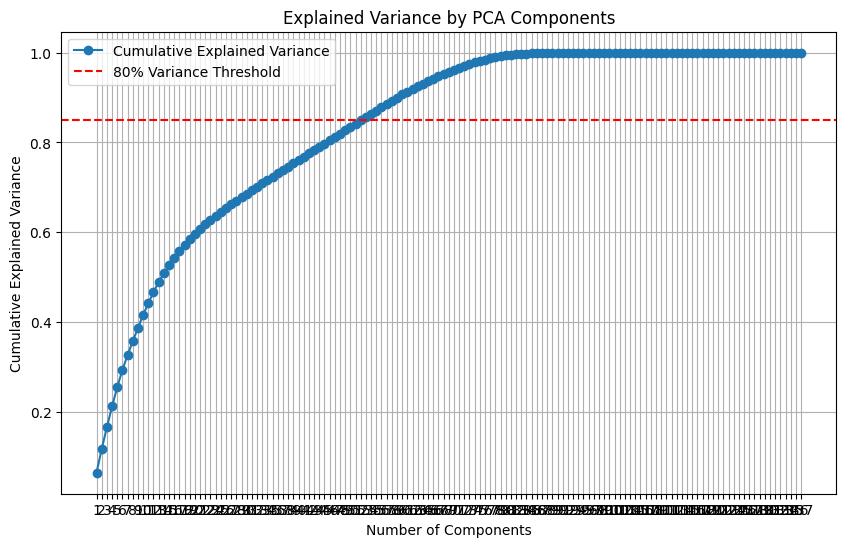

Number of components needed: 46


In [42]:
pca = PCA()  # Initialize PCA without specifying components
pca.fit(X_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', label='Cumulative Explained Variance')
plt.axhline(y=0.85, color='r', linestyle='--', label='80% Variance Threshold')
plt.title('Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.legend()
plt.grid()
plt.show()

# Calculate the number of components needed to explain at least 80% variance
components = np.argmax(cumulative_variance >= 0.80) + 1  # Add 1 to get the count of components
print(f"Number of components needed: {components}")

In [43]:
X_pca = pca.transform(X_scaled)
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
first_47_pcs_df = X_pca_df.iloc[:, :47].copy()
#first_47_pcs_df


print(pca.components_.shape)
print(scantronMath_38_df.columns)

cols_drop = ['studentId','level', 'is_proficient','dataSource', 'proficient_score']
columns_to_drop = [col for col in cols_drop if col in scantronMath_38_df.columns]
feature_names = scantronMath_38_df.drop(columns=columns_to_drop).columns

(137, 137)
Index(['studentId', 'level', 'dataSource', 'is_proficient', 'proficient_score',
       'course_AIDELIB7-8NC', 'course_AIDSTU6-12NC', 'course_ARTHIS7-8',
       'course_Advisory 5', 'course_Advisory 6',
       ...
       'school_Elementary School F', 'school_Intermediate School E',
       'school_Middle School A', 'school_Middle School C',
       'school_Middle School D', 'school_Middle School F', 'iready_math',
       'iready_reading', 'bbb_literacy', 'past_proficient_score'],
      dtype='object', length=142)


In [44]:
components = pca.components_[:47]  
# Create a DataFrame for feature loadings
# Rows correspond to features, and columns correspond to principal components
feature_loadings_df = pd.DataFrame(
    components.T,  # Transpose to match features as rows
    columns=[f'PC{i+1}' for i in range(components.shape[0])],  # PC1, PC2, ..., PC108
    index= feature_names  # Feature names
)

# Initialize a list to store the top features across all principal components
all_top_features = []

# For each principal component, find the top features
for pc in feature_loadings_df.columns:
    # Get the absolute values of the loadings and sort them
    sorted_features = feature_loadings_df[pc].abs().sort_values(ascending=False)
    # Get the top 5 features for the current principal component (adjustable)
    top_features = sorted_features.head(5).index.tolist()
    # Add the component and its top features to the list
    for feature in top_features:
        all_top_features.append((pc, feature))

# Create a DataFrame to view all top features for each principal component
top_features_df = pd.DataFrame(all_top_features, columns=['Principal Component', 'Top Feature'])

# Display the DataFrame
print(top_features_df)

    Principal Component                   Top Feature
0                   PC1               course_HOMEROOM
1                   PC1                  course_HWK-4
2                   PC1              course_SCIENCE 3
3                   PC1                   course_PE 3
4                   PC1               course_SOC ST 3
5                   PC2             course_CivicsGr 7
6                   PC2               course_Geog Gr7
7                   PC2           course_English Gr 7
8                   PC2                 course_Math 7
9                   PC2            course_LifeSci Gr7
10                  PC3            course_WLDHIS 1500
11                  PC3            course_PhySci Gr 8
12                  PC3           course_English Gr 8
13                  PC3           course_Survey Elec8
14                  PC3           course_Math8 PreAlg
15                  PC4                 course_MATH 4
16                  PC4             course_LANGUAGE 4
17                  PC4     

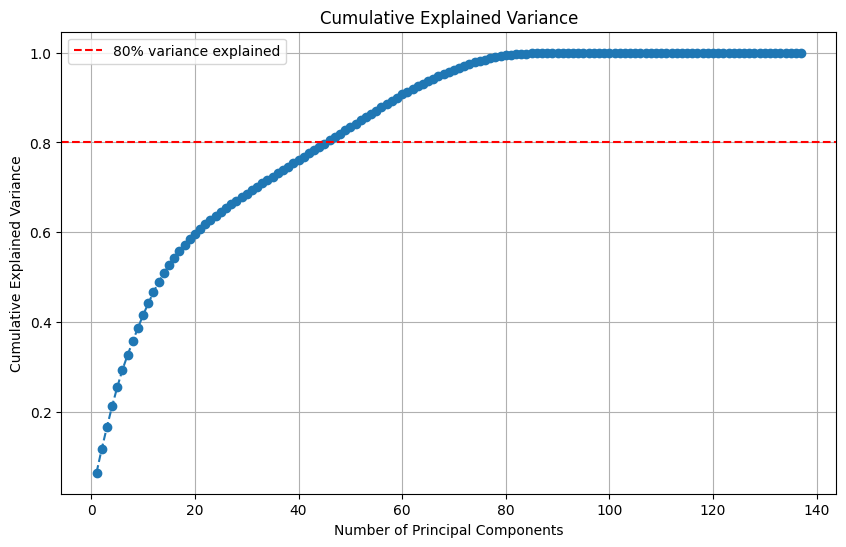

In [45]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% variance explained')  # Adjust threshold as needed
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

Training on PCA

In [46]:
X_PCA = first_47_pcs_df  # PCA-transformed features
y_PCA = scantronMath_38_df['proficient_score']
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, y_PCA, test_size=0.20,stratify = scantronMath_38_df['is_proficient'], random_state=123)
print(X_train_PCA.shape)

(12119, 47)


In [47]:
'''
max_depth_values = [18,23,32]
n_estimators_value = [100,250,300,350]
param_grid = {'max_depth' : list(max_depth_values), 'n_estimators' : list(n_estimators_value)}

#Grid Search to find the best hyperparameters 
print("Running Grid Search")
rf_regressor_PCA = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid_PCA = GridSearchCV(rf_regressor_PCA, param_grid, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search_PCA = rf_grid_PCA.fit(X_train_PCA, y_train_PCA)

print("Done")
rf_best_params_PCA = rf_grid_search_PCA.best_params_

rf_best_params_PCA
{'max_depth': 18, 'n_estimators': 300}
'''


'\nmax_depth_values = [18,23,32]\nn_estimators_value = [100,250,300,350]\nparam_grid = {\'max_depth\' : list(max_depth_values), \'n_estimators\' : list(n_estimators_value)}\n\n#Grid Search to find the best hyperparameters \nprint("Running Grid Search")\nrf_regressor_PCA = RandomForestRegressor()\n\n# will have a 3-fold cross validation \nrf_grid_PCA = GridSearchCV(rf_regressor_PCA, param_grid, cv=3, scoring=\'neg_root_mean_squared_error\')\nrf_grid_search_PCA = rf_grid_PCA.fit(X_train_PCA, y_train_PCA)\n\nprint("Done")\nrf_best_params_PCA = rf_grid_search_PCA.best_params_\n\nrf_best_params_PCA\n{\'max_depth\': 18, \'n_estimators\': 300}\n'

In [48]:
rf_model_PCA = RandomForestRegressor(max_depth=18, n_estimators=300)
rf_model_PCA.fit(X_train_PCA,y_train_PCA)

RandomForestRegressor(max_depth=18, n_estimators=300)

Metrics PCA

In [49]:
y_rf_pred_PCA= rf_model_PCA.predict(X_test_PCA)
rf_rmse_PCA = mean_squared_error(y_test_PCA, y_rf_pred_PCA, squared=False)
rf_r2_PCA = r2_score(y_test_PCA, y_rf_pred_PCA)

threshold = 1
y_rf_pred_bool_PCA = y_rf_pred_PCA >= threshold
y_test_bool_PCA = y_test_PCA >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_rf_pred_bool_PCA, y_test_bool_PCA))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse_PCA))
print('[RF] R2: {0}'.format(rf_r2_PCA))   

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.88      0.89      2128
        True       0.74      0.79      0.76       902

    accuracy                           0.85      3030
   macro avg       0.82      0.83      0.83      3030
weighted avg       0.86      0.85      0.85      3030

[RF] Root Mean Squared Error: 0.0512676638703676
[RF] R2: 0.5089382472339465


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
micro_f1_PCA  = f1_score(y_test_bool_PCA , y_rf_pred_bool_PCA , average='micro')

print("Micro F1 Score:", micro_f1_PCA )

Micro F1 Score: 0.8524752475247525


Training

In [51]:
#training
y = scantronMath_38_df['proficient_score']
X= scantronMath_38_df.drop(['proficient_score', 'is_proficient', 'studentId','dataSource', 'level'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.20,stratify= scantronMath_38_df['is_proficient'], random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 15149
(12119, 137)
(3030, 137)


In [ ]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.

max_depth_values38 = [5,15,30]
n_estimators_value38 = [100,250,300,400]
param_grid38 = {'max_depth' : list(max_depth_values38), 'n_estimators' : list(n_estimators_value38)}


print("Running Grid Search")
rf_regressor38 = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid38 = GridSearchCV(rf_regressor38, param_grid38, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search38 = rf_grid38.fit(X_train, y_train)

print("Done")
rf_best_params38 = rf_grid_search38.best_params_

rf_best_params38
#{'max_depth': 5, 'n_estimators': 100}


Running Grid Search
Done


{'max_depth': 5, 'n_estimators': 100}

In [53]:
rf_model38 = RandomForestRegressor(max_depth=5, n_estimators=100)
rf_model38.fit(X_train,y_train)
y_rf_pred38 = rf_model38.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred38, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred38)
#trying to get f1 and accuracy score 
threshold = 1
y_pred38_bool = y_rf_pred38 >= threshold
y_test38_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test38_bool, y_pred38_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.92      0.89      2065
        True       0.80      0.71      0.75       965

    accuracy                           0.85      3030
   macro avg       0.83      0.81      0.82      3030
weighted avg       0.85      0.85      0.85      3030

[RF] Root Mean Squared Error: 0.047290714683669445
[RF] R2: 0.582168856128781


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [54]:
#looking at the micro score
micro_f1 = f1_score(y_test38_bool, y_pred38_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.8508250825082508


Confusion Matrix:
[[1891  174]
 [ 278  687]]


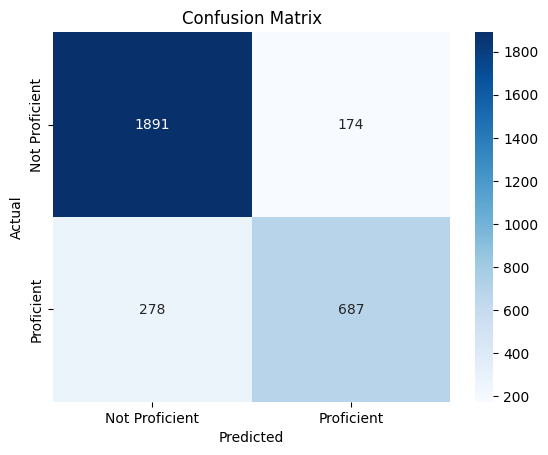

In [55]:
cm = confusion_matrix(y_test38_bool, y_pred38_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [56]:
importances = rf_model38.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                          Feature  Importance
136         past_proficient_score    0.950782
60                  course_MATH 5    0.003750
14                  course_Band 7    0.003402
126    school_Elementary School E    0.003000
95               course_SCIENCE 5    0.002535
99                course_SOC ST 4    0.002251
17            course_CONTISSU 7-8    0.002069
49             course_HANDWRITING    0.001893
100               course_SOC ST 5    0.001822
115           course_StuAid6-12NC    0.001394
94               course_SCIENCE 4    0.001373
34              course_EngElec7-8    0.001338
111           course_SocialStuGr5    0.001209
54              course_LANGUAGE 4    0.001139
59                  course_MATH 4    0.001069
106           course_Science Gr 6    0.001043
91               course_READING 4    0.001033
132        school_Middle School F    0.000974
105           course_Science Gr 5    0.000946
63               course_Marketing    0.000942
56            course_LifeSciH Gr7 

In [57]:
importance_df.head(20)
#interesting that math 5 is the only importance featues in top 20 instead of other math courses

,Feature,Importance
136,past_proficient_score,0.950782
60,course_MATH 5,0.003750
14,course_Band 7,0.003402
126,school_Elementary School E,0.003000
95,course_SCIENCE 5,0.002535
99,course_SOC ST 4,0.002251
17,course_CONTISSU 7-8,0.002069
49,course_HANDWRITING,0.001893
100,course_SOC ST 5,0.001822
115,course_StuAid6-12NC,0.001394


shap

In [58]:
explainer = shap.Explainer(rf_model38)
shap_test = explainer(X_test)
shap_df = pd.DataFrame(shap_test.values, columns=shap_test.feature_names,
  index=X_test.index)
# Fetch the importances
shap_df = shap_df.apply(np.abs).mean().sort_values(ascending=False)
print(shap_df)

past_proficient_score           4.545778e-02
school_Elementary School E      2.980289e-04
course_SCIENCE 5                1.435307e-04
course_HANDWRITING              1.416721e-04
course_HOMEROOM                 1.266217e-04
course_SOC ST 5                 1.228420e-04
course_SOC ST 4                 1.223641e-04
course_Science Gr 6             8.546130e-05
course_Band 7                   7.977092e-05
course_SCIENCE 4                7.128784e-05
course_LANGUAGE 4               6.977500e-05
course_SocialStuGr6             6.392925e-05
course_MATH 5                   6.163951e-05
course_MATH 3                   5.808749e-05
course_MATH 4                   5.698006e-05
course_READING 4                5.373596e-05
course_StuAid6-12NC             4.836309e-05
school_Elementary School F      4.697275e-05
course_SOC ST 3                 4.570803e-05
school_Middle School F          4.316815e-05
course_PE 3                     3.859919e-05
course_SCIENCE 3                3.575788e-05
course_PE 

<Axes: title={'center': 'Top 10 Important Features'}>

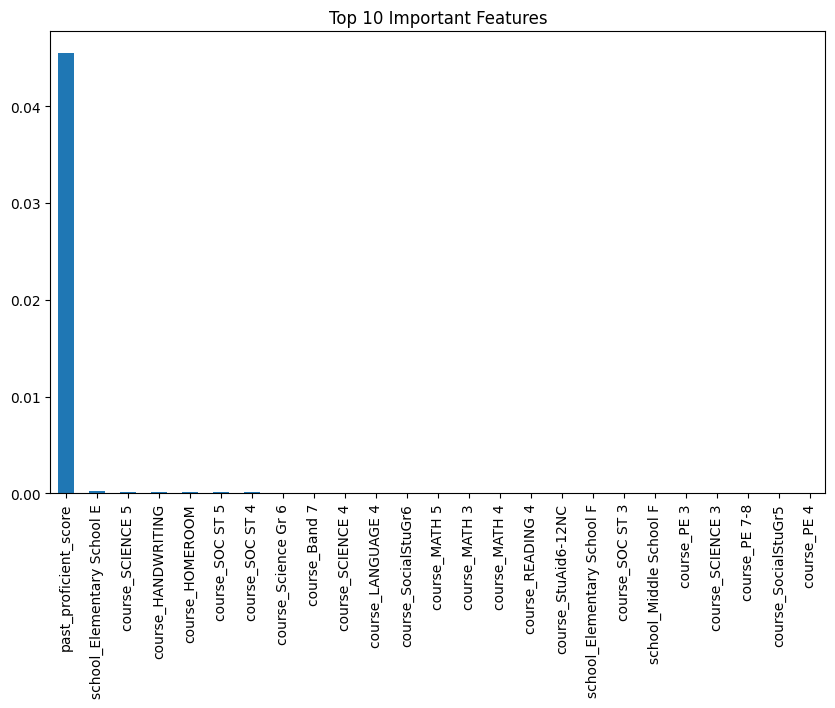

In [59]:
shap_df.head(25).plot(kind='bar', title='Top 10 Important Features', figsize=(10, 6))


# no past_proficient_score

In [60]:
scantronMath_38_df = pd.read_csv('../dataframes/scantronMath_38.csv')
scantronMath_38_df.head()

,studentId,level,dataSource,is_proficient,proficient_score,course_AIDELIB7-8NC,course_AIDSTU6-12NC,course_ARTHIS7-8,course_Advisory 5,course_Advisory 6,course_Advisory 7,course_Advisory 7-8,course_Advisory 8,course_Aide Off 7-8,course_BAND 6,course_BAND 7 Brass,course_BAND 7 Percu,course_BAND 7 Wood,course_BROADCAS 7-8,course_Band 7,course_Band7,course_BandGuitar78,course_CONTISSU 7-8,course_CREAWRT 7-8,course_CSElec Gr7-8,course_CareerPrep-A,course_CareerPrepA5,course_CivicH/Adv 7,course_CivicsGr 7,course_ContIssu 7-8,course_Drama 7-8,course_ELA IntPK-6,course_ELAGrPK5H/Ad,course_ELAGrPK6H/Ad,course_ENRICELA78,course_ENRICMATH78,course_ESLENRICH6-8,course_ESLEnrich6-8,course_Eng 7 H/Adv,course_EngElec7-8,course_EngIntrv7-12,course_EngLang6,course_English Gr 7,course_English Gr 8,course_English LA 5,course_English LA 6,course_EnricMath78,course_EnrichmtP6,course_Extrcur6-12C,course_ForSci7-8,course_Geog Gr7,course_GeogH/AdvGr7,course_Gifted,course_Gifted 5,course_HANDWRITING,course_HOMEROOM,course_HWK-4,course_Handwriting,course_LANGUAGE 3,course_LANGUAGE 4,course_LifeSci Gr7,course_LifeSciH Gr7,course_MATH,course_MATH 3,course_MATH 4,course_MATH 5,course_MATH 6,course_MATH 7,course_Marketing,course_Math 7,course_Math 7 H/A,course_Math 8,"course_Math,Grade 5",course_Math5H/Adv,course_Math6H/Adv,course_Math8 PreAlg,course_MthCooking,course_MthIntrv7-12,course_Music Grade5,course_Music Grade6,course_MusicApp 7,course_OLDigitalCit,course_PE 3,course_PE 4,course_PE 5,course_PE 6,course_PE 7,course_PE 7 Girls,course_PE 7-8,course_PE 8,course_PhySci Gr 8,course_Phys Ed Gr 5,course_Phys Ed Gr 6,course_PhysEd Gr7-8,course_READ 3,course_READING 3,course_READING 4,course_Reading.BS 7,course_SCIENCE 3,course_SCIENCE 4,course_SCIENCE 5,course_SCIENCE 6,course_SCIENCE LI 7,course_SOC ST 3,course_SOC ST 4,course_SOC ST 5,course_SOC ST 6,course_ScElecGr7-8,course_SciG5H/A,course_SciGr6H/A,course_Science Gr 5,course_Science Gr 6,course_SoDevSk6-12C,course_SoSt5H/A,course_SoSt6H/A,course_SocStudies 6,course_SocialStuGr5,course_SocialStuGr6,course_Sp&Lang Imp,course_SpanishExp 7,course_StuAid6-12NC,course_StuAide7-8NC,course_StuHall6-12,course_StuHallPK6,course_Survey Elec7,course_Survey Elec8,course_Tech Ed 7-8,course_WLDHIS 1500,course_Yearbook 7-8,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,bbb_literacy,past_proficient_score
0,44777,7,value_scantronMath,False,0.935351,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,0,0,0,0.957757
1,44783,7,value_scantronMath,False,0.974724,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False

Training

In [61]:
#training
y = scantronMath_38_df['proficient_score']
X= scantronMath_38_df.drop(['proficient_score', 'is_proficient', 'studentId','dataSource', 'level', 'past_proficient_score'], axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.25,stratify= scantronMath_38_df['is_proficient'], random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 20571
(15428, 136)
(5143, 136)


In [62]:
#setting up the param grid, possible hyperparameter for max_depth and n_estimators:The number of trees in the forest.

'''
max_depth_values38 = [5,15, 30]
n_estimators_value38 = [100,250,400]
param_grid38 = {'max_depth' : list(max_depth_values38), 'n_estimators' : list(n_estimators_value38)}


print("Running Grid Search")
rf_regressor38 = RandomForestRegressor()

# will have a 3-fold cross validation 
rf_grid38 = GridSearchCV(rf_regressor38, param_grid38, cv=3, scoring='neg_root_mean_squared_error')
rf_grid_search38 = rf_grid38.fit(X_train, y_train)

print("Done")
rf_best_params38 = rf_grid_search38.best_params_

rf_best_params38
'''

'\nmax_depth_values38 = [5,15, 30]\nn_estimators_value38 = [100,250,400]\nparam_grid38 = {\'max_depth\' : list(max_depth_values38), \'n_estimators\' : list(n_estimators_value38)}\n\n\nprint("Running Grid Search")\nrf_regressor38 = RandomForestRegressor()\n\n# will have a 3-fold cross validation \nrf_grid38 = GridSearchCV(rf_regressor38, param_grid38, cv=3, scoring=\'neg_root_mean_squared_error\')\nrf_grid_search38 = rf_grid38.fit(X_train, y_train)\n\nprint("Done")\nrf_best_params38 = rf_grid_search38.best_params_\n\nrf_best_params38\n'

In [63]:
rf_model38 = RandomForestRegressor(max_depth=5, n_estimators=250)
rf_model38.fit(X_train,y_train)
y_rf_pred38 = rf_model38.predict(X_test)
rf_rmse = mean_squared_error(y_test, y_rf_pred38, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred38)
#trying to get f1 and accuracy score 
threshold = 1.0
y_pred38_bool = y_rf_pred38 >= threshold
y_test38_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test38_bool, y_pred38_bool))

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))        

threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.70      1.00      0.82      3552
        True       0.85      0.03      0.06      1591

    accuracy                           0.70      5143
   macro avg       0.77      0.52      0.44      5143
weighted avg       0.75      0.70      0.59      5143

[RF] Root Mean Squared Error: 0.08442551952412476
[RF] R2: 0.021555463193078106


c:\Users\lmmag\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


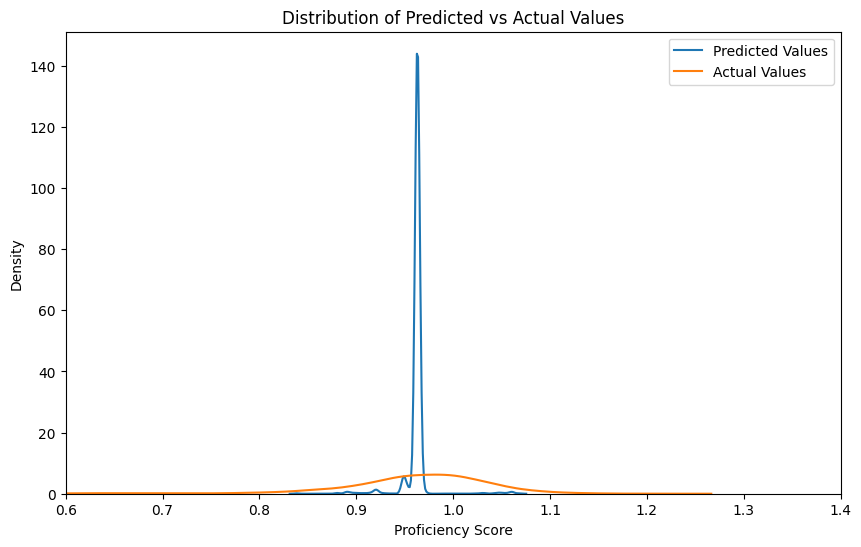

In [64]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=y_rf_pred38, label='Predicted Values')
sns.kdeplot(data=y_test, label='Actual Values')
plt.title('Distribution of Predicted vs Actual Values')
plt.xlim(0.6, 1.4)
plt.xlabel('Proficiency Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [65]:
#looking at the micro score
micro_f1 = f1_score(y_test38_bool, y_pred38_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.6990083608788644


Confusion Matrix:
[[3543    9]
 [1539   52]]


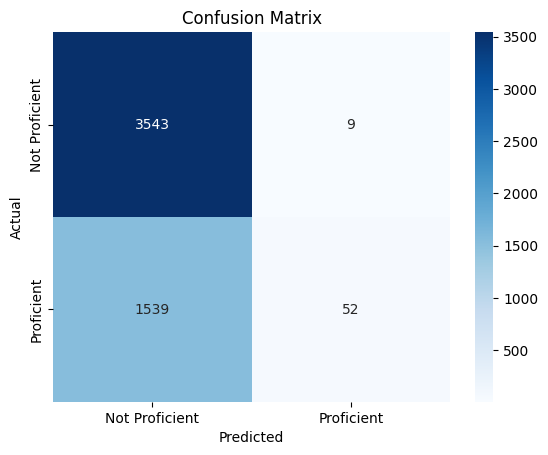

In [66]:
cm = confusion_matrix(y_test38_bool, y_pred38_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [67]:
importances = rf_model38.feature_importances_
feature_names = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                          Feature    Importance
65              course_Math 7 H/A  2.263213e-01
118             course_StuHallPK6  1.908599e-01
64                  course_Math 7  1.717724e-01
17            course_CONTISSU 7-8  3.352983e-02
134                iready_reading  3.157654e-02
104              course_SciGr6H/A  2.956372e-02
109               course_SoSt6H/A  2.683711e-02
28            course_ELAGrPK6H/Ad  2.337921e-02
69              course_Math6H/Adv  1.970627e-02
115           course_StuAid6-12NC  1.833752e-02
117            course_StuHall6-12  1.673140e-02
37            course_English Gr 7  1.559312e-02
133                   iready_math  1.206056e-02
97            course_SCIENCE LI 7  1.175351e-02
33             course_Eng 7 H/Adv  1.115928e-02
119           course_Survey Elec7  1.028053e-02
14                  course_Band 7  9.462890e-03
114           course_SpanishExp 7  8.124500e-03
22            course_CivicH/Adv 7  8.077745e-03
47                  course_Gifted  8.058

In [68]:
importance_df.head(20)
#interesting that math 5 is the only importance featues in top 20 instead of other math courses

,Feature,Importance
65,course_Math 7 H/A,0.226321
118,course_StuHallPK6,0.190860
64,course_Math 7,0.171772
17,course_CONTISSU 7-8,0.033530
134,iready_reading,0.031577
104,course_SciGr6H/A,0.029564
109,course_SoSt6H/A,0.026837
28,course_ELAGrPK6H/Ad,0.023379
69,course_Math6H/Adv,0.019706
115,course_StuAid6-12NC,0.018338
